# Analysis 2
- Read all emails of top convicts and storing the email ids of person to whom they sent the mail
- Counted the number of emails each convict sent to other employees
- Displayed the top 5 employees to whom they sent the mail frequently
- Plotted a chart to display the collected information visually

In [1]:
# Importing the required modules
import os
import re
import time
import nltk
import operator
import datetime
import email.utils
import numpy as np
from email.parser import Parser
from matplotlib import pyplot as plt

In [2]:
all_employees = ['lay-k', 'skilling-j', 'whalley-g'] # Prepared a list for convicts directories

emp_name_list = [] # Creating an empty list which will store employee name and local path for source directory

lay_emailid_list = [] # A list to store all employee email ids to which he had send a mail
skilling_emailid_list = [] # A list to store all employee email ids to which he had send a mail
whalley_emailid_list = [] # A list to store all employee email ids to which he had send a mail
  
for emp in all_employees: # Looping through all employees
    filepath_emp = '~\\midterm\\data\\enron\\maildir\\' + emp # Creating path to employee directory
    filepath_actual = os.path.expanduser(filepath_emp) # Creating actual path acccording to OS
    emp_name_list.append([emp,filepath_actual]) # Populating the list with emp name and their directory path

for emp, emp_path in emp_name_list: # Looping through each employee and their directory
    for subdir, dirs, files in os.walk(emp_path):  # Looping through each files present under directories and sub directories
        for file in files: # Looping through each found directories, subdirectories or files
            if(file[0] != '.'): # If selected file is a file and not a directory
                
                try: # Putting whole code in a try except block to catch unwanted errors
                    response = open(os.path.join(subdir, file), 'r', errors = 'ignore') # Extracting the email
                    email_emp = Parser().parsestr(response.read()) # Parsing the extracted email
        
                    if emp == 'lay-k': # Checking if emails are for Kenneth lay                
                        match = re.findall(r'[\w\.-]+@[\w\.-]+', email_emp['To']) # Extracting all email ids
                        for x in match: # Looping through each email id
                            lay_emailid_list.append(x) # Adding each email id to the list
                    
                    elif emp == 'skilling-j': # Checking if emails are for Jeffrey K.Skilling                  
                        match = re.findall(r'[\w\.-]+@[\w\.-]+', email_emp['To']) # Extracting all email ids
                        for x in match: # Looping through each email id
                            skilling_emailid_list.append(x) # Adding each email id to the list
                    
                    elif emp == 'whalley-g': # Checking if emails are for Greg Whalley                  
                        match = re.findall(r'[\w\.-]+@[\w\.-]+', email_emp['To']) # Extracting all email ids
                        for x in match: # Looping through each email id
                            whalley_emailid_list.append(x) # Adding each email id to the list
                except(RuntimeError, TypeError, NameError):
                    pass

In [3]:
lay_emailid_unique_dict = set(lay_emailid_list) # Creating unique email ids
skilling_emailid_unique_dict = set(skilling_emailid_list) # Creating unique email ids
whalley_emailid_unique_dict = set(whalley_emailid_list) # Creating unique email ids

count_lay = 0 # Creating a temporary variable and assigning value 0 to it
lay_dict = {} # Creating an empty dictionary to store email ids and their frequency
for x in lay_emailid_unique_dict: # Looping through each unique email ids
    for y in lay_emailid_list: # Looping through all email ids
        if x == y: # If both email ids match
            count_lay = count_lay + 1 # Increment the temp variable by 1
    lay_dict.update({x:count_lay}) # Add email id alonwith its frequency to the dictionary
    count_lay = 0 # Reassiging the temp variable to 0 for outer for loop
    
count_skilling = 0 # Creating a temporary variable and assigning value 0 to it
skilling_dict = {} # Creating an empty dictionary to store email ids and their frequency
for x in skilling_emailid_unique_dict: # Looping through each unique email ids
    for y in skilling_emailid_list: # Looping through all email ids
        if x == y: # If both email ids match
            count_skilling = count_skilling + 1 # Increment the temp variable by 1
    skilling_dict.update({x:count_skilling}) # Add email id alonwith its frequency to the dictionary
    count_skilling = 0 # Reassiging the temp variable to 0 for outer for loop
    
count_whalley = 0 # Creating a temporary variable and assigning value 0 to it
whalley_dict = {} # Creating an empty dictionary to store email ids and their frequency
for x in whalley_emailid_unique_dict: # Looping through all email ids
    for y in whalley_emailid_list: # Looping through all email ids
        if x == y: # If both email ids match
            count_whalley = count_whalley + 1 # Increment the temp variable by 1
    whalley_dict.update({x:count_whalley}) # Add email id alonwith its frequency to the dictionary
    count_whalley = 0 # Reassiging the temp variable to 0 for outer for loop

In [6]:
# Sorting the dictionaries in descending order of frequency
sorted_lay_dict = sorted(lay_dict.items(), key=operator.itemgetter(1), reverse = True)
sorted_skilling_dict = sorted(skilling_dict.items(), key=operator.itemgetter(1), reverse = True)
sorted_whalley_dict = sorted(whalley_dict.items(), key=operator.itemgetter(1), reverse = True)

# Eliminating the mails they send to themselves
final_lay_list = [(x[0], x[1]) for x in sorted_lay_dict[:7] if x[0] not in ['kenneth.lay@enron.com', 'klay@enron.com']]
final_skilling_list = [(x[0], x[1]) for x in sorted_skilling_dict[:7] if x[0] not in ['jeff.skilling@enron.com', 'jskilli@enron.com']]
final_whalley_list = [(x[0], x[1]) for x in sorted_whalley_dict[:6] if x[0] not in ['greg.whalley@enron.com']]

# Displaying top 5 results
print(final_lay_list[:5])
print(final_skilling_list[:5])
print(final_whalley_list[:5])

[('jeff.skilling@enron.com', 372), ('mark.koenig@enron.com', 313), ('mark.frevert@enron.com', 304), ('greg.whalley@enron.com', 304), ('steven.kean@enron.com', 278)]
[('kenneth.lay@enron.com', 286), ('greg.whalley@enron.com', 204), ('mark.frevert@enron.com', 190), ('louise.kitchen@enron.com', 190), ('steven.kean@enron.com', 183)]
[('louise.kitchen@enron.com', 324), ('mark.frevert@enron.com', 304), ('john.lavorato@enron.com', 244), ('jeffrey.mcmahon@enron.com', 205), ('kenneth.lay@enron.com', 198)]


In [7]:
# Storing top 5 frequencies to be used for y-axis excluding mails which he sent to himself while keeping his emaild id in 'To'
y_values_lay = [x[1] for x in sorted_lay_dict[:7] if x[0] not in ['kenneth.lay@enron.com', 'klay@enron.com']]

# Storing top 5 emails ids to be used for x-axis excluding mails which he sent to himself while keeping his emaild id in 'To'
x_values_lay = [y[0] for y in sorted_lay_dict[:7] if y[0] not in ['kenneth.lay@enron.com', 'klay@enron.com']]

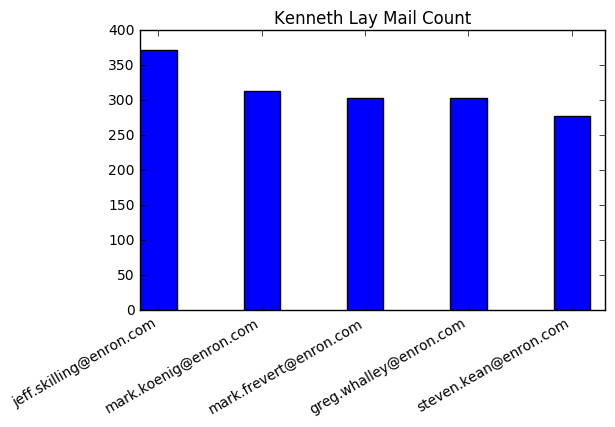

In [8]:
fig = plt.figure() # Caliing the figure function from matplotlib module
ax = fig.add_subplot(111) # Creating a subplot
ax.set_title("Kenneth Lay Mail Count") # Setting up the title for plot

width = .35  # Setting the width between each element of histogram
ind = np.arange(len(y_values_lay)) # Arranging the frequencies on y axis
plt.bar(ind, y_values_lay, width=width) # Plotting the chart
plt.xticks(ind + width / 2, x_values_lay) # Displaying the tick in the middle on x axis

fig.autofmt_xdate() # Formatting the x axis to make values readable

# Creating a path to store the created chart
save_path = os.path.expanduser('~\\midterm\\que1\\ana_2\\Kenneth Lay Mail Count.pdf')

plt.savefig(save_path) # Saving the chart to desired location

plt.show() # Displaying the chart

In [9]:
# Storing top 5 frequencies to be used for y-axis excluding mails which he sent to himself while keeping his emaild id in 'To'
y_values_skilling = [x[1] for x in sorted_skilling_dict[:7] if x[0] not in ['jeff.skilling@enron.com', 'jskilli@enron.com']]

# Storing top 5 emails ids to be used for x-axis excluding mails which he sent to himself while keeping his emaild id in 'To'
x_values_skilling = [y[0] for y in sorted_skilling_dict[:7] if y[0] not in ['jeff.skilling@enron.com', 'jskilli@enron.com']]

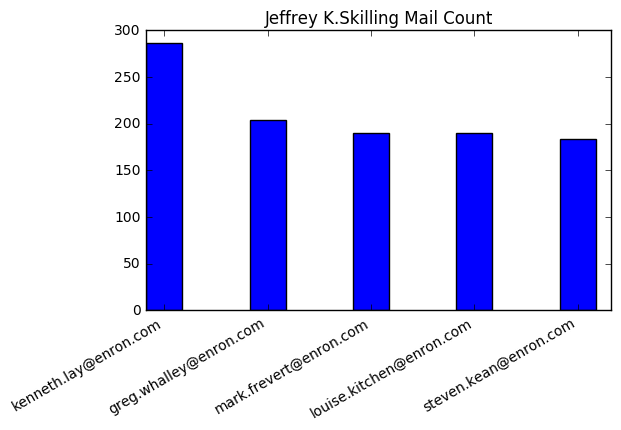

In [10]:
fig = plt.figure() # Caliing the figure function from matplotlib module
ax = fig.add_subplot(111) # Creating a subplot
ax.set_title("Jeffrey K.Skilling Mail Count") # Setting up the title for plot

width = .35 # Setting the width between each element of histogram
ind = np.arange(len(y_values_skilling)) # Arranging the frequencies on y axis
plt.bar(ind, y_values_skilling, width=width) # Plotting the chart
plt.xticks(ind + width / 2, x_values_skilling) # Displaying the tick in the middle on x axis

fig.autofmt_xdate() # Formatting the x axis to make values readable

# Creating a path to store the created chart
save_path = os.path.expanduser('~\\midterm\\que1\\ana_2\\Jeffrey K.Skilling Mail Count.pdf')

plt.savefig(save_path) # Saving the chart to desired location

plt.show() # Displaying the chart

In [11]:
# Storing top 5 frequencies to be used for y-axis excluding mails which he sent to himself while keeping his emaild id in 'To'
y_values_whalley = [x[1] for x in sorted_whalley_dict[:6] if x[0] not in ['greg.whalley@enron.com']]

# Storing top 5 emails ids to be used for x-axis excluding mails which he sent to himself while keeping his emaild id in 'To'
x_values_whalley = [y[0] for y in sorted_whalley_dict[:6] if y[0] not in ['greg.whalley@enron.com']]

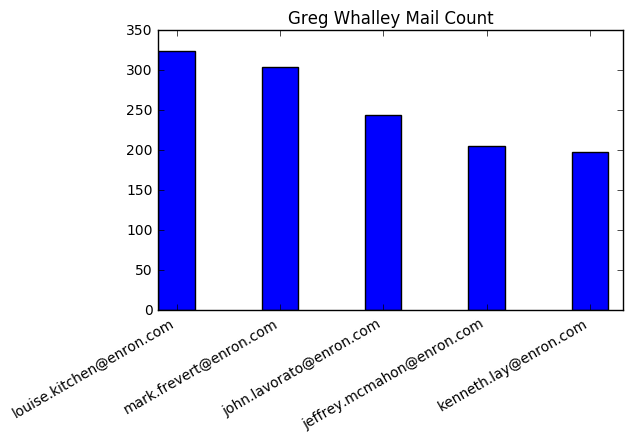

In [12]:
fig = plt.figure() # Caliing the figure function from matplotlib module
ax = fig.add_subplot(111) # Creating a subplot
ax.set_title("Greg Whalley Mail Count") # Setting up the title for plot

width = .35 # Setting the width between each element of histogram
ind = np.arange(len(y_values_whalley)) # Arranging the frequencies on y axis
plt.bar(ind, y_values_whalley, width=width) # Plotting the chart
plt.xticks(ind + width / 2, x_values_whalley) # Displaying the tick in the middle on x axis

fig.autofmt_xdate() # Formatting the x axis to make values readable

# Creating a path to store the created chart
save_path = os.path.expanduser('~\\midterm\\que1\\ana_2\\Greg Whalley Mail Count.pdf')

plt.savefig(save_path) # Saving the chart to desired location

plt.show() # Displaying the chart